# prince kumar sharma

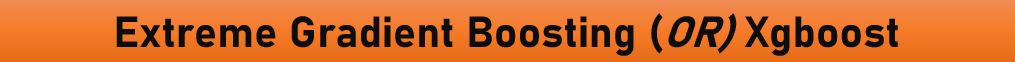

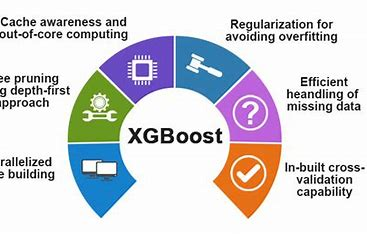

# Extreme Gradient Boosting

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm that is widely used in supervised learning tasks, especially in predictive modeling and regression problems. It is an optimized implementation of the gradient boosting framework.

XGBoost is known for its speed, scalability, and high performance. It leverages the concept of gradient boosting, which combines the predictions of multiple weak learners (usually decision trees) to create a strong predictive model.

Here are some key features and advantages of XGBoost:

1. Regularization: XGBoost has built-in regularization techniques to prevent overfitting, such as L1 and L2 regularization. These techniques help control the complexity of the model and improve generalization.

2. Handling missing values: XGBoost has a built-in mechanism to handle missing values in the input data. It can automatically learn how to treat missing values during the training process.

3. Parallel processing: XGBoost supports parallel processing, which makes it efficient and scalable. It can take advantage of multiple CPU cores to train models faster and handle large datasets.

4. Tree pruning: XGBoost uses a technique called tree pruning, which helps reduce the complexity of the trees and improve their generalization ability. This leads to more compact and accurate models.

5. Feature importance: XGBoost provides a feature importance score, indicating the relative importance of each feature in the model. This information can be used for feature selection or understanding the underlying patterns in the data.

Overall, XGBoost has become a popular choice in machine learning competitions and real-world applications due to its excellent performance and versatility. It can be used for both classification and regression tasks and is compatible with various programming languages, including Python, R, and Julia.

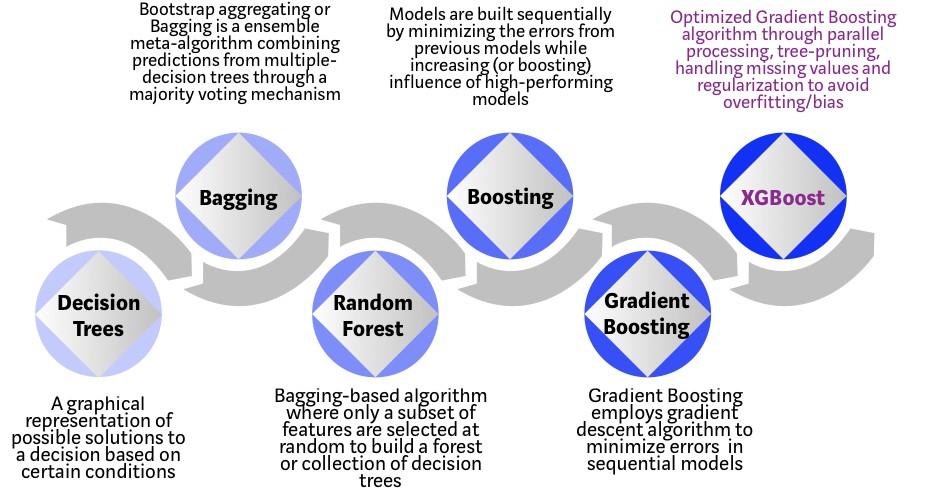

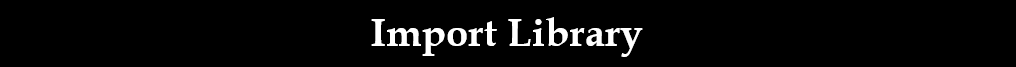

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score,r2_score
sns.set_style("darkgrid")

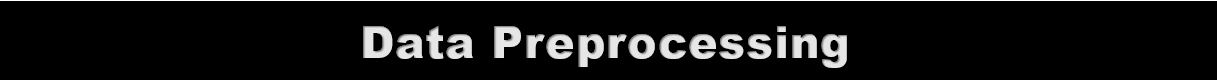

In [2]:
df=pd.read_csv("C:/Users/Prince kumar/OneDrive/Desktop/mldataset/House_prediction.csv")

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.shape

(10692, 13)

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [6]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [7]:
df.isna().sum().reset_index()

,index,0
0,city,0
1,area,0
2,rooms,0
3,bathroom,0
4,parking spaces,0
5,floor,0
6,animal,0
7,furniture,0
8,hoa (R$),0
9,rent amount (R$),0


In [8]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


In [9]:
for i in df:
    print(f"\n unique value in this columns \n {i} :- {df[i].unique()} ")


 unique value in this columns 
 city :- ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte'] 

 unique value in this columns 
 area :- [   70   320    80    51    25   376    72   213   152    35    26    46
    36    55   100   330   110    88    56   600    42   160    90    49
    41    64   208    20    32    45   350    38    30    40   300   240
   200   360   250    48   150    60    31   210   280    93    75   194
    65   278    61   130   164   220   108   128    47   170    68    63
   145    85   254   296   133    44    22    50    67   109   400   284
   309    73   155    58    94    76   192   217    95   900    34    62
   180   140    52   999   270    71   500    96   660   107   105   287
    24   154   101   384    57    39    78    28    83   750   258   123
   127   219   420    59   225   480    53   121    43   570    89   173
    91   530    87   136   308   260   120    33   131   161   720   236
    81   125    37   230   450   234   1

In [10]:
df["floor"]=df["floor"].replace("-",1).astype(int)

In [11]:
df['floor'].unique()

array([  7,  20,   6,   2,   1,   4,   3,  10,  11,  24,   9,   8,  17,
        18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,  23,
        35,  25,  46,  28,  29, 301,  51,  32])

In [12]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int32
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

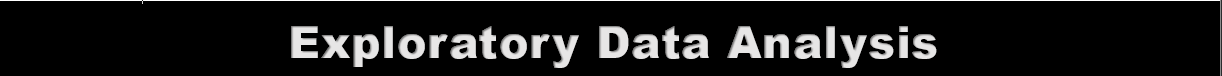

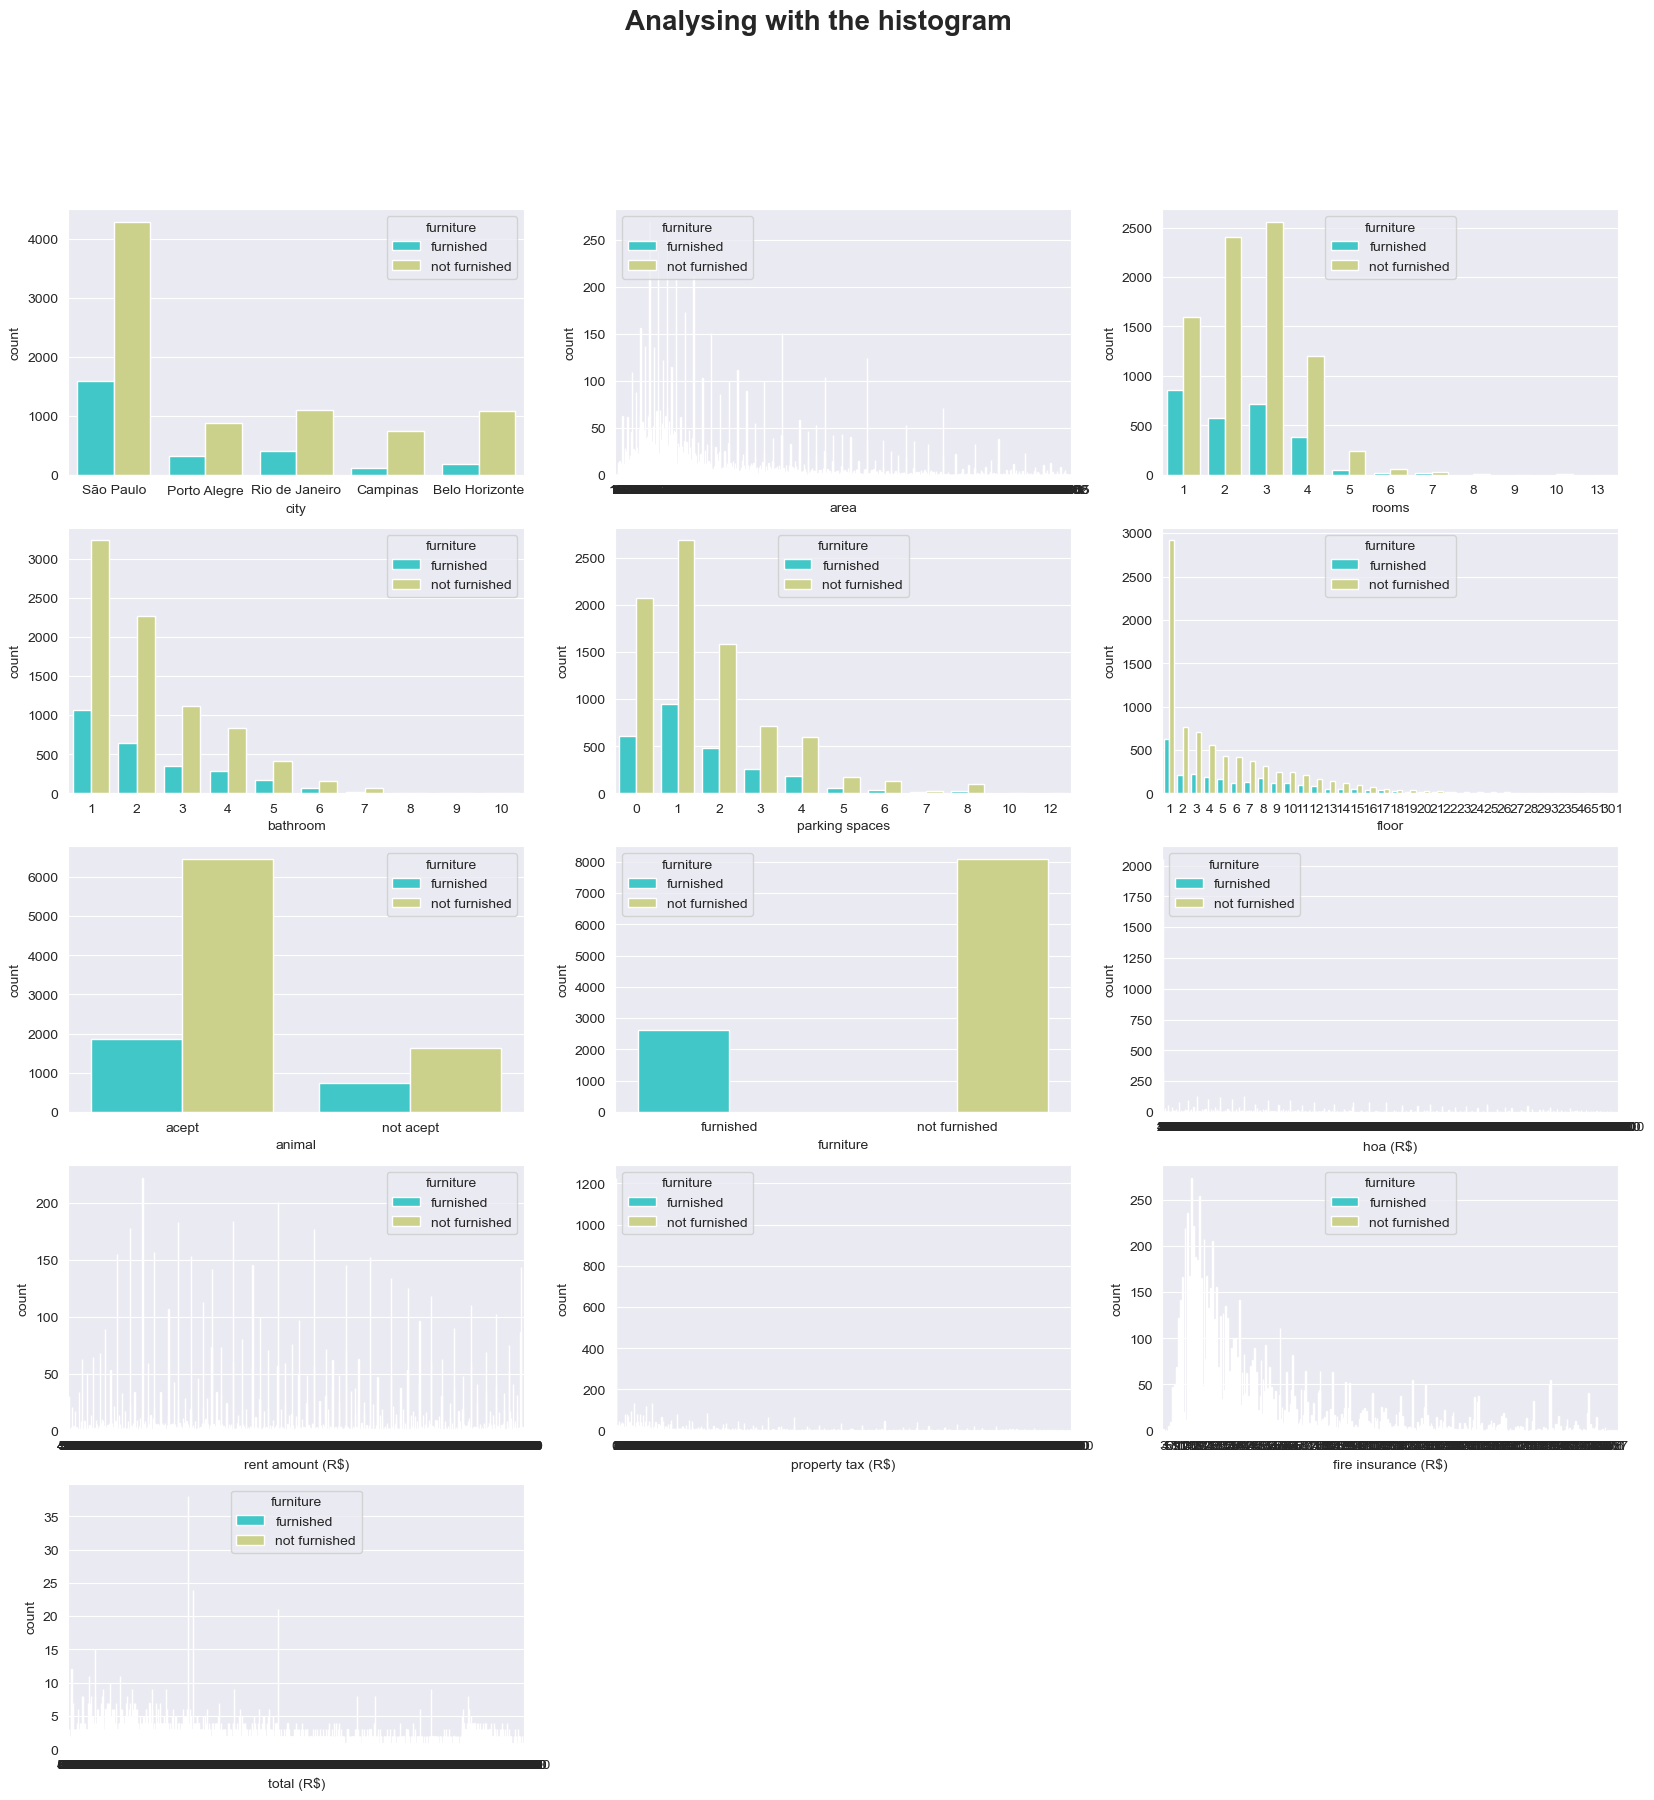

In [13]:
plt.figure(figsize=(20,20))
a=1
for i in df:
    plt.subplot(5,3,a)
    sns.countplot(data=df,x=i,palette="rainbow",hue="furniture")
    a+=1
plt.suptitle("Analysing with the histogram",fontweight="bold",fontsize=20)
plt.show()

In [14]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,1,acept,not furnished,0,1400,165,22,1587


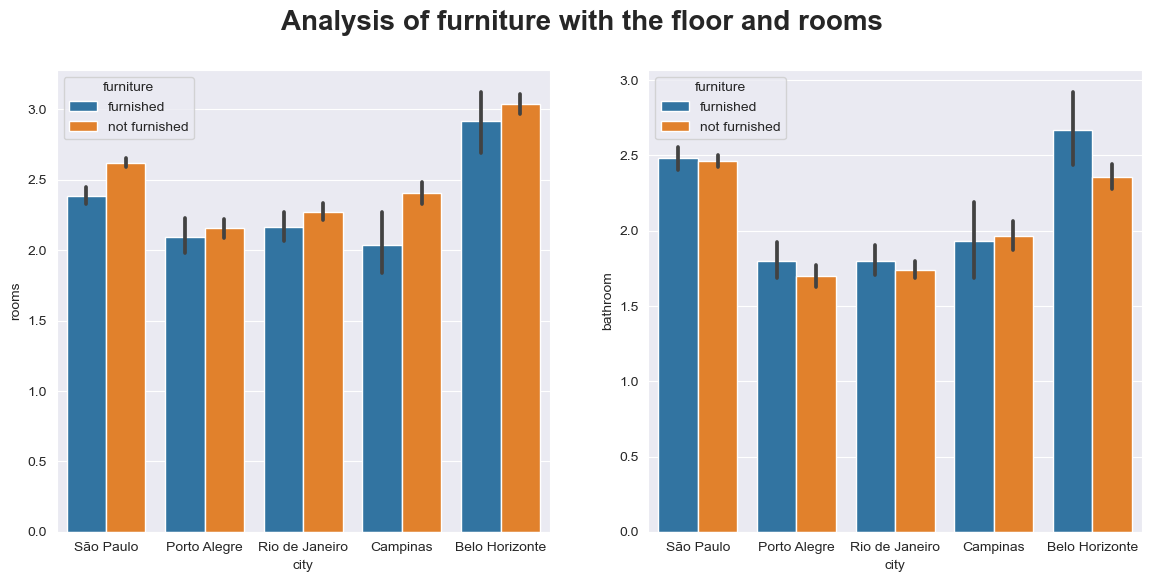

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=df,x="city",y="rooms",hue="furniture")
plt.subplot(1,2,2)
sns.barplot(data=df,x="city",y="bathroom",hue="furniture")
plt.suptitle("Analysis of furniture with the floor and rooms",fontweight="bold",fontsize=20)
plt.show()

In [16]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,1,acept,not furnished,0,1400,165,22,1587


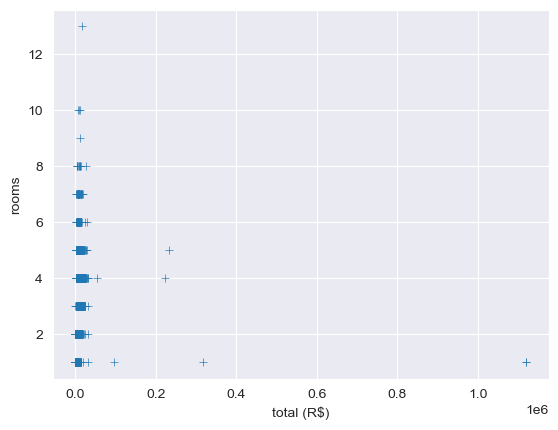

In [17]:
sns.scatterplot(data=df,y="rooms",x="total (R$)",marker="+");

In [18]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int32
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [19]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,1,acept,not furnished,0,1400,165,22,1587


In [20]:
df.corr()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,-0.007116,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,-0.062808,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.021424,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,-0.001259,0.009321,0.578361,0.098378,0.597348,0.148684
floor,-0.007116,-0.062808,0.021424,-0.001259,1.000000,0.017875,0.087893,0.013936,0.032806,0.037800
hoa (R$),0.006890,0.007139,0.050271,0.009321,0.017875,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.087893,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.013936,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.032806,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.037800,0.955024,0.264490,0.218344,0.254911,1.000000


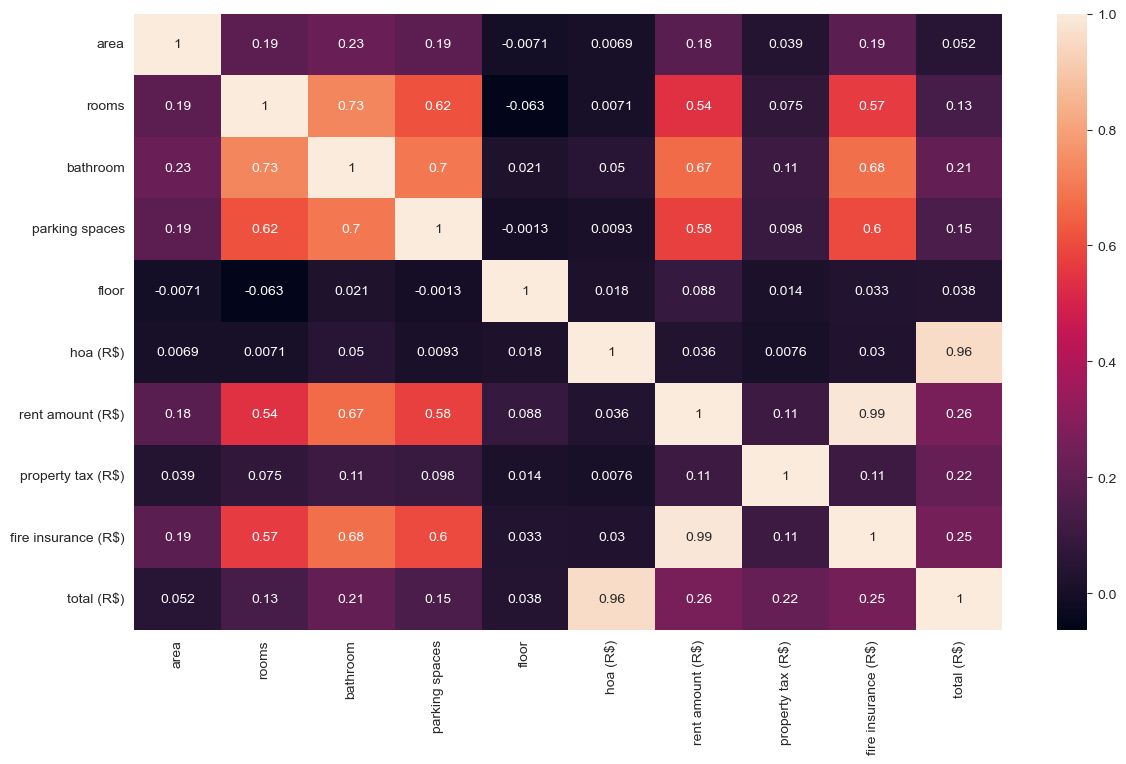

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


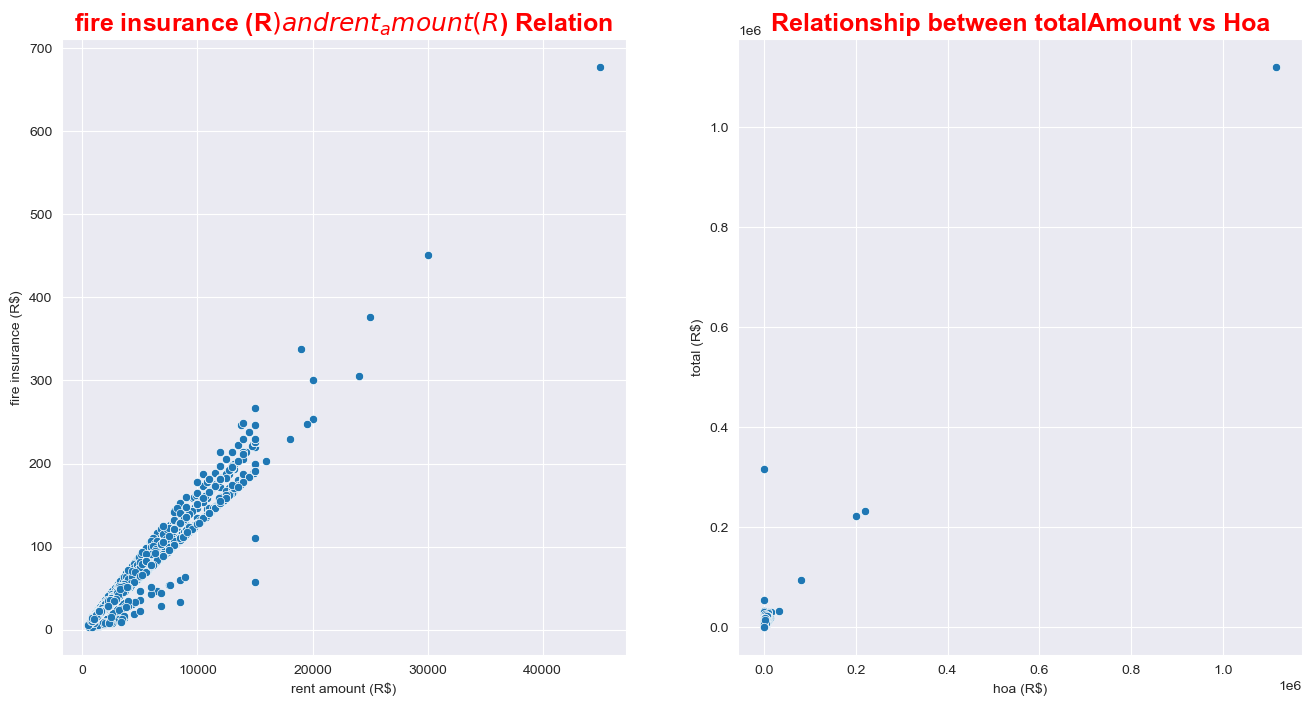

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x="rent amount (R$)",y="fire insurance (R$)")
plt.title("fire insurance (R$) and  rent_amount (R$) Relation",fontweight="bold",fontsize=18,color="red")
plt.subplot(1,2,2)
sns.scatterplot(data=df,x="hoa (R$)",y="total (R$)")
plt.title("Relationship between totalAmount vs Hoa",fontweight="bold",fontsize=18,color="red") 
plt.show()

1. Here is Rent Amount and fire insurance are highly co-related to each other with the two other columns in this dataset.
2. Its show the linear relationship between the both columns 
3. Total Amount and Hoa Amount are highly co-related its show the linear relation

In [24]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,1,acept,not furnished,0,1400,165,22,1587


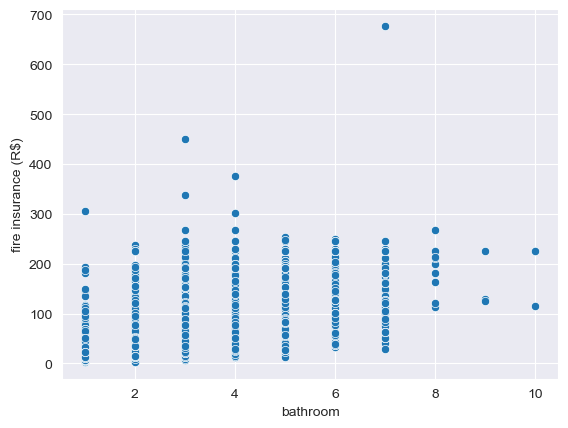

In [25]:
sns.scatterplot(data=df,x="bathroom",y="fire insurance (R$)");

In [26]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,1,acept,not furnished,0,1400,165,22,1587


In [27]:
x=df["city"].value_counts().reset_index()
x

,index,city
0,São Paulo,5887
1,Rio de Janeiro,1501
2,Belo Horizonte,1258
3,Porto Alegre,1193
4,Campinas,853


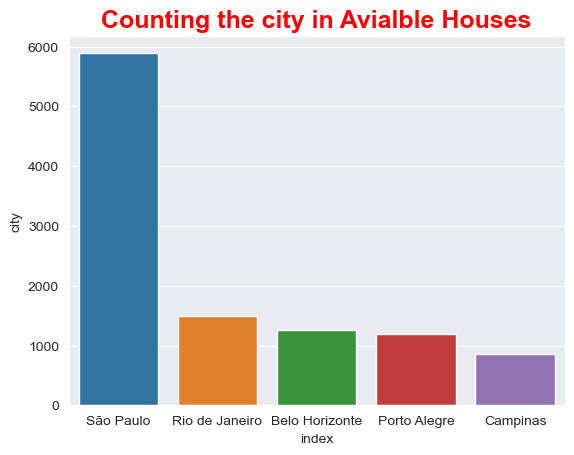

In [28]:
sns.barplot(data=x,x="index",y="city")
plt.title("Counting the city in Avialble Houses",fontweight="bold",fontsize=18,color="red")
plt.show()

In [29]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,1,acept,not furnished,0,1400,165,22,1587


# Now converting the data from categorical to numerical 

In [30]:
sc= LabelEncoder()

In [31]:
df["city"]=sc.fit_transform(df["city"])

In [32]:
df['animal']=sc.fit_transform(df["animal"])

In [33]:
df['furniture']=sc.fit_transform(df['furniture'])

In [34]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836


In [35]:
df.dtypes

city                   int32
area                   int64
rooms                  int64
bathroom               int64
parking spaces         int64
floor                  int32
animal                 int32
furniture              int32
hoa (R$)               int64
rent amount (R$)       int64
property tax (R$)      int64
fire insurance (R$)    int64
total (R$)             int64
dtype: object

# Extract the Target from the dataset  And Extract the feature 

In [36]:
x=df.drop("animal",axis=1)

In [37]:
x.tail(10)

,city,area,rooms,bathroom,parking spaces,floor,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10682,2,160,3,2,3,4,0,850,3300,220,49,4419
10683,4,280,4,4,2,5,1,4200,4000,1042,51,9293
10684,3,98,2,1,0,1,1,560,3900,184,51,4695
10685,4,83,3,2,2,11,1,888,7521,221,96,8726
10686,4,150,3,3,2,8,0,0,13500,0,172,13670
10687,2,63,2,1,1,5,0,402,1478,24,22,1926
10688,4,285,4,4,4,17,1,3100,15000,973,191,19260
10689,3,70,3,3,0,8,0,980,6000,332,78,7390
10690,3,120,2,2,2,8,0,1585,12000,279,155,14020
10691,4,80,2,1,0,1,1,0,1400,165,22,1587


In [38]:
y=df[["animal"]]

In [39]:
y.T

,0,1,2,3,4,5,6,7,8,9,...,10682,10683,10684,10685,10686,10687,10688,10689,10690,10691
animal,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


# train Test split the features and labels 

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [41]:
print("-"*120)
print(f"The shape of the x_train is : {x_train.shape}")
print("-"*120)
print(f"The shape of the x_test is  : {x_test.shape}")
print("-"*120)
print(f"The shape of the y_train is : {y_train.shape}")
print("-"*120)
print(f"The shape of the y_test is  :{y_test.shape}")
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
The shape of the x_train is : (8553, 12)
------------------------------------------------------------------------------------------------------------------------
The shape of the x_test is  : (2139, 12)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_train is : (8553, 1)
------------------------------------------------------------------------------------------------------------------------
The shape of the y_test is  :(2139, 1)
------------------------------------------------------------------------------------------------------------------------


# Now  I'm Ready for the apply machine learning algorithm

In [44]:
# extreme Gradient Boosting
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
ac=xg.score(x_test,y_test)

In [46]:
acc=xg.score(x_train,y_train)

In [47]:
print("-"*120)
print(f"The Accuracy of the test data is : {ac}")
print("-"*120)
print(f"The Accuracy of the train data is : {acc}")
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test data is : 0.7779336138382422
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the train data is : 0.9090377645270665
------------------------------------------------------------------------------------------------------------------------


In [48]:
pred=xg.predict(x_test)

In [49]:
print("-"*120)
print("-"*120)
print(pred)
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
[0 0 1 ... 0 1 0]
------------------------------------------------------------------------------------------------------------------------


In [51]:
cm=confusion_matrix(y_test,pred)

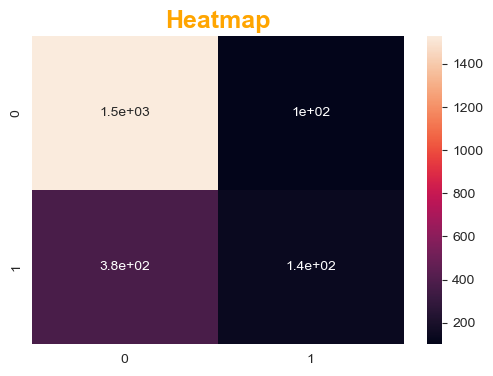

In [52]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.title("Heatmap",fontweight='bold',fontsize=18,color="orange")
plt.show()

In [53]:
clr=classification_report(y_test,pred)

In [55]:
print("-"*120)
print(clr)
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1628
           1       0.58      0.27      0.36       511

    accuracy                           0.78      2139
   macro avg       0.69      0.60      0.61      2139
weighted avg       0.75      0.78      0.75      2139

------------------------------------------------------------------------------------------------------------------------


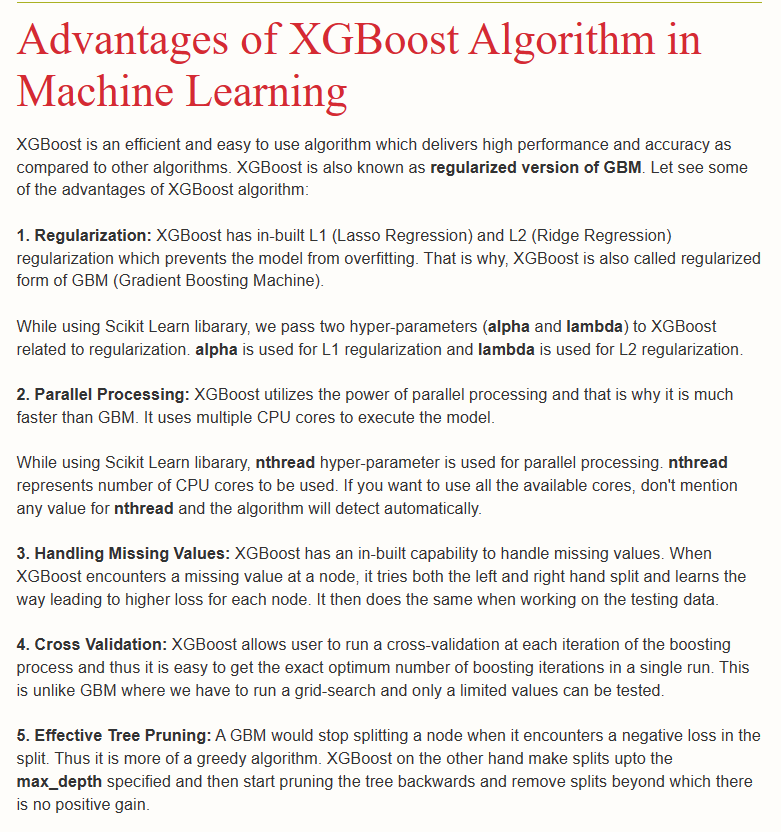

# Thanks----------------------------------------------------------------------------------------------------